In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/vishwaraj/Desktop/winequality-red.csv',sep=',')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.shape

(1599, 12)

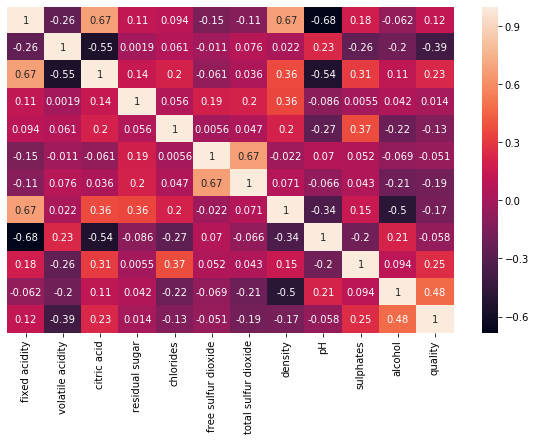

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),yticklabels=False,annot=True)

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

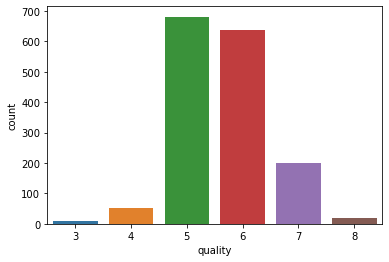

In [10]:
sns.countplot(x='quality',data=df)

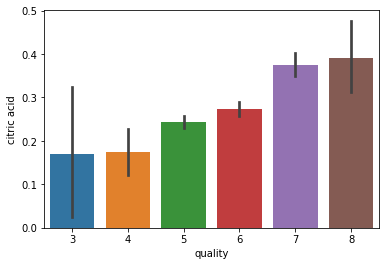

In [11]:
sns.barplot(x='quality',y='citric acid',data=df)

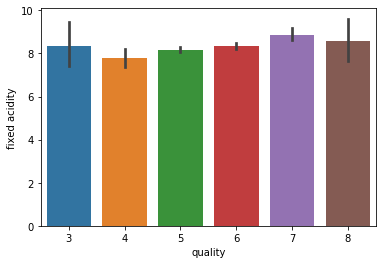

In [12]:
sns.barplot(x='quality',y='fixed acidity',data=df)

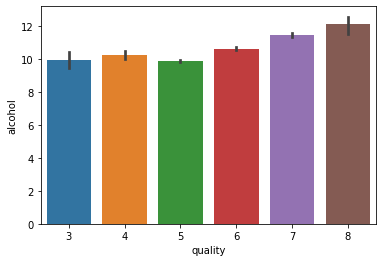

In [13]:
sns.barplot(x='quality',y='alcohol',data=df)

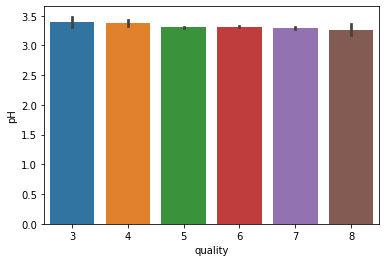

In [14]:
sns.barplot(x="quality",y="pH",data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015781A1F5F8>,
      dtype=object)

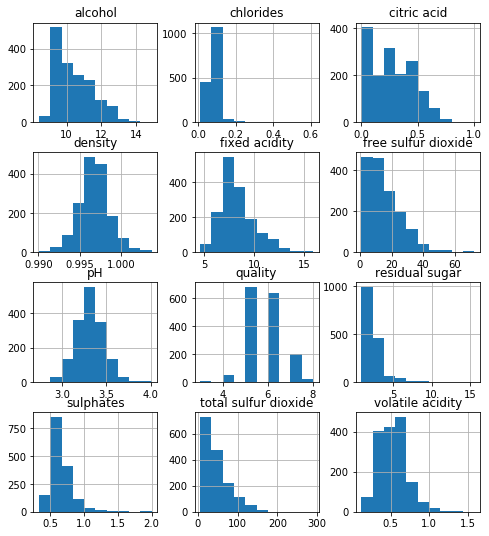

In [15]:
df.hist(figsize=(8,9))

In [16]:
#from scipy.stats import zscore
#zs=abs(zscore(df))
##df1=df.loc[(zs<3).all(axis=1)]
#df.shape,df1.shape

In [17]:
#df.skew()

In [18]:
#df.dropna(inplace=True)

In [49]:
x=df.drop(columns=["quality"])
y=df[["quality"]]

In [47]:
x.shape,y.shape

((1599, 11), (1599,))

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 4,test_size=0.30)

In [53]:
model=[LinearRegression(),AdaBoostRegressor(),GradientBoostingRegressor(),SVR(),KNeighborsRegressor(),XGBRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('model',m,'r2 score is:',r2_score(y_test,pred))
    print()
    print()

model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) r2 score is: 0.34410225374497283


model AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) r2 score is: 0.32996828595537075


model GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) r2 score is: 0.4109603009101628


model

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    rs=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            rs=r_state
            
    print("max r2 score corresponding to ",rs," is ",max_r_score)
    return rs
    

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={"n_neighbors":range(1,50)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 47}

In [55]:
knr=KNeighborsRegressor(n_neighbors=47)
maxr2_score(knr,x,y)

max r2 score corresponding to  61  is  0.3820433282576786


61

In [56]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [57]:
svr=SVR(kernel='rbf',C=0.01)
maxr2_score(svr,x,y)

max r2 score corresponding to  83  is  0.29797035112465275


83

In [58]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
maxr2_score(adb,x,y)

max r2 score corresponding to  61  is  0.45779506047472107


61

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"criterion":["mae","mse"],"n_estimators":[100,200,500]}
clf = GridSearchCV(rfr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'criterion': 'mse', 'n_estimators': 500}

In [60]:
rfr=RandomForestRegressor(criterion='mse',n_estimators=100)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  61  is  0.5720828598484848
